In [ ]:
# posso usare numba con pandas ??  compute.use_numba

In [2]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)
pd.set_option("max_colwidth", 40)
pd.set_option("expand_frame_repr", False)
pd.set_option("display.precision", 7)

from plt_parameters import init_params
init_params()

In [3]:
def open_df_results(file_csv):
    df_data = pd.read_csv(file_csv, header=[0,1])
    df_data.drop(columns=['device', 'logging'], inplace=True)
    senza_loss = df_data['risultati','test_loss'] == '_'
    print(f"Erano presenti {senza_loss.sum()} righe vuote")
    df_data.drop(df_data[senza_loss].index, inplace=True)
    
    #risolve il problema dovuto a celle che contengono liste, che in lettura vengono prese come stringhe
    df_data[('model', 'GCNneurons_per_layer')] = df_data[('model', 'GCNneurons_per_layer')].apply(literal_eval)
    df_data[('model', 'neurons_last_linear')] = df_data[('model', 'neurons_last_linear')].apply(literal_eval)
    df_data[('risultati', 'test_loss')] = df_data[('risultati', 'test_loss')].apply(literal_eval)
    df_data[('risultati', 'test_accuracy')] = df_data[('risultati', 'test_accuracy')].apply(literal_eval)
    df_data[('risultati', 'correlation_class0')] = df_data[('risultati', 'correlation_class0')].apply(literal_eval)
    df_data[('risultati', 'correlation_class1')] = df_data[('risultati', 'correlation_class1')].apply(literal_eval)
    
    return df_data

In [4]:
file = "df_configs_new2.csv"
df_data = open_df_results(file)

file = "df_configs_new3.csv"
df_data3 = open_df_results(file)

file = "df_configs_new7.csv"
df_last_linears = open_df_results(file)

/tmp/ipykernel_8422/2016246085.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_data.drop(columns=['device', 'logging'], inplace=True)
/tmp/ipykernel_8422/2016246085.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_data.drop(columns=['device', 'logging'], inplace=True)


Erano presenti 96 righe vuote
Erano presenti 0 righe vuote
Erano presenti 0 righe vuote


/tmp/ipykernel_8422/2016246085.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_data.drop(columns=['device', 'logging'], inplace=True)


# Studio le correlazioni 

### varia Learning rate

In [4]:
# seleziono un'architettura usata
model_GCNneurons_per_layer = [1, 16, 16, 1]
neurons_last_linear = (2,1)
m1 = df_data[('model', 'neurons_last_linear')] ==neurons_last_linear
m2 = df_data[('graph_dataset','Num_grafi_per_tipo')] == 200
res_df = df_data[m1 & m2]

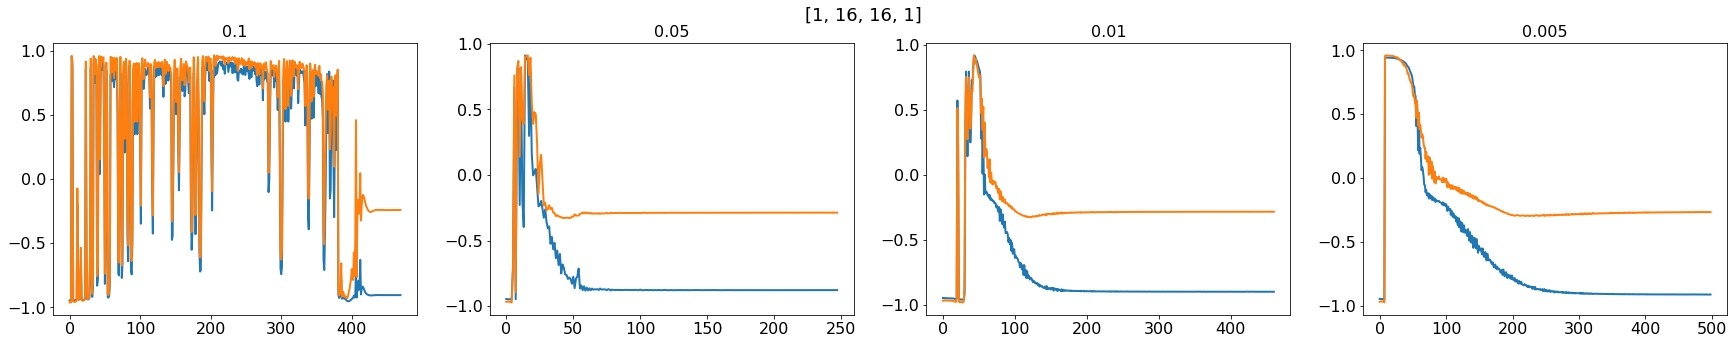

In [5]:
col = res_df.shape[0]
fig, axs = plt.subplots(1,col,figsize=(30,5))
for i, row in res_df.iterrows():
    c_e_0 = row[('risultati', 'correlation_class0')]
    axs[i].plot(c_e_0)
    c_e_1 = row[('risultati', 'correlation_class1')]
    axs[i].plot(c_e_1)
    axs[i].set_title(res_df.loc[i,('training','learning_rate')])
plt.suptitle(res_df.loc[0,('model','GCNneurons_per_layer')])
#plt.savefig("correlation_vs_epochs_layers_2b.png")
plt.show()

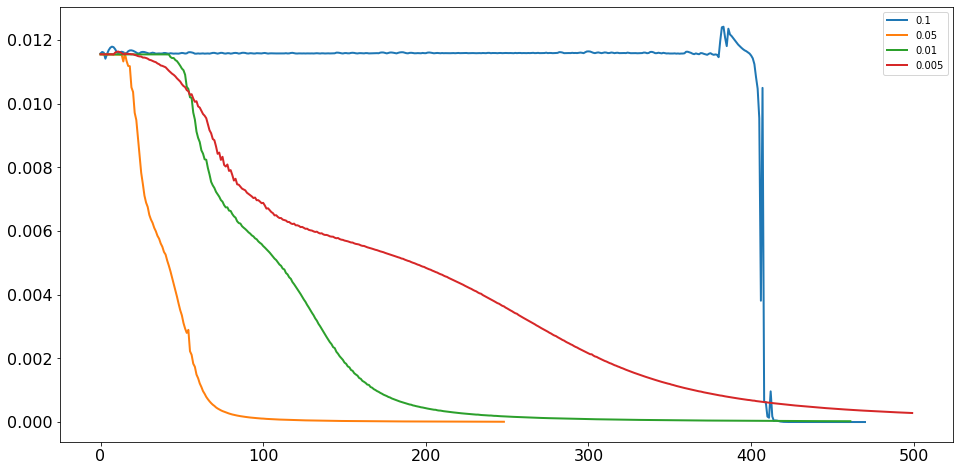

In [6]:
for i, corr0 in enumerate(df_data[m1 & m2][('risultati', 'test_loss')].values):
    plt.plot(corr0, label=df_data[m1 & m2].loc[i,('training', 'learning_rate')] )
    plt.legend()

In [6]:
df_data3#[('model', 'neurons_last_linear')].isin([neurons_last_linear])

Unnamed: 0_level_0 graph_dataset                                                                                                                                                      training                                                                                                                model                                                                                                                                             training                                risultati                                                                                                                           
   Unnamed: 0_level_1       ERmodel regular confmodel continuous_p       list_p      range_p   Num_nodes Num_grafi_per_tipo Num_grafi_totali list_degree random_node_feat list_exponents     mode epochs batch_size percentage_train earlystop_patience epochs_model_checkpoint every_epoch_embedding last_layer_dense GCNneurons_per_layer neurons_last_linear freezeGCNlayers autoencoder put_batchnorm put_dropout final_pool_aggregator node_features_dim learning_rate                                test_loss                            test_accuracy                       correlation_class0                       correlation_class1
0                   0         False   False      True         True  [0.05, 0.3]  [0.05, 0.6]  [700, 700]                200              400     [4, 50]            False   [-2.5, -4.5]    mode2    500        100              0.7                 50                    [-1]                  True            False           [1, 16, 1]              [3, 1]           False       False         False       False                  True                 1         0.100  [0.011580794056256612, 0.01159814248...  [0.48333333333333334, 0.483333333333...  [-0.934711898636403, -0.939377594014...  [-0.9285494124036358, -0.94291541944...
1                   1         False   False      True         True  [0.05, 0.3]  [0.05, 0.6]  [700, 700]                200              400     [4, 50]            False   [-2.5, -4.5]    mode2    500        100              0.7                 50                    [-1]                  True            False           [1, 16, 1]              [3, 1]           False       False         False       False                  True                 1         0.050  [0.011549743016560872, 0.01154739707...  [0.5083333333333333, 0.5083333333333...  [-0.9369690130293655, -0.93966827073...  [-0.9550609898171785, -0.95264686904...
2                   2         False   False      True         True  [0.05, 0.3]  [0.05, 0.6]  [700, 700]                200              400     [4, 50]            False   [-2.5, -4.5]    mode2    500        100              0.7                 50                    [-1]                  True            False           [1, 16, 1]              [3, 1]           False       False         False       False                  True                 1         0.010  [0.011526272197564443, 0.01151747852...  [0.49166666666666664, 0.491666666666...  [0.9326236003162849, 0.9383644994603...  [0.9559937317602034, 0.9534972164503...
3                   3         False   False      True         True  [0.05, 0.3]  [0.05, 0.6]  [700, 700]                200              400     [4, 50]            False   [-2.5, -4.5]    mode2    500        100              0.7                 50                    [-1]                  True            False           [1, 16, 1]              [3, 1]           False       False         False       False                  True                 1         0.005  [0.011554259061813354, 0.01155408422...  [0.55, 0.55, 0.55, 0.55, 0.55, 0.55,...  [-0.9344298352754766, -0.93260584682...  [-0.9560599467430633, -0.95627194019...
4                   4         False   False      True         True  [0.05, 0.3]  [0.05, 0.6]  [700, 700]                200              400     [4, 50]            False   [-2.5, -4.5]    mode2    500        100              0.7                 50            

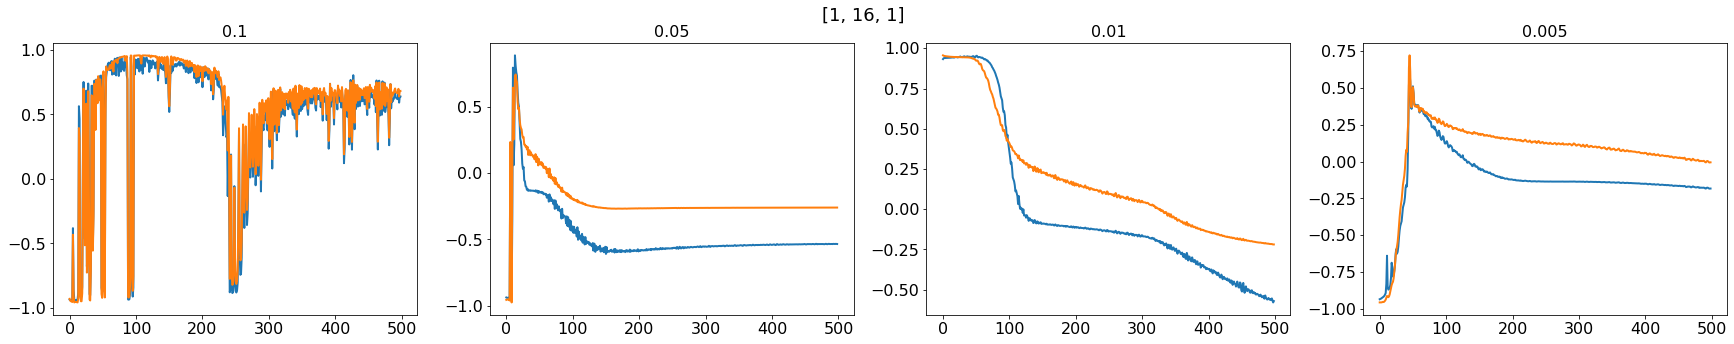

In [7]:
# seleziono un'architettura usata
model_GCNneurons_per_layer = [1, 16, 1]
neurons_last_linear = [3,1]
m1 = df_data3[('model', 'GCNneurons_per_layer')].isin([model_GCNneurons_per_layer])
#m2 = df_data3[('graph_dataset','Num_grafi_per_tipo')] == 200
res_df3 = df_data3[m1]

col = res_df3.shape[0]
fig, axs = plt.subplots(1,col,figsize=(30,5))
for i, row in res_df3.iterrows():
    c_e_0 = row[('risultati', 'correlation_class0')]
    axs[i].plot(c_e_0)
    c_e_1 = row[('risultati', 'correlation_class1')]
    axs[i].plot(c_e_1)
    axs[i].set_title(res_df3.loc[i,('training','learning_rate')])
plt.suptitle(res_df3.loc[0,('model','GCNneurons_per_layer')])
#plt.savefig("correlation_vs_epochs_layers_2b.png")
plt.show()

### varia lr e i livelli densi

In [10]:
file = "df_configs_new4.csv"
df_data4 = open_df_results(file)
#df_data4

Erano presenti 0 righe vuote


/tmp/ipykernel_638650/2016246085.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_data.drop(columns=['device', 'logging'], inplace=True)


5


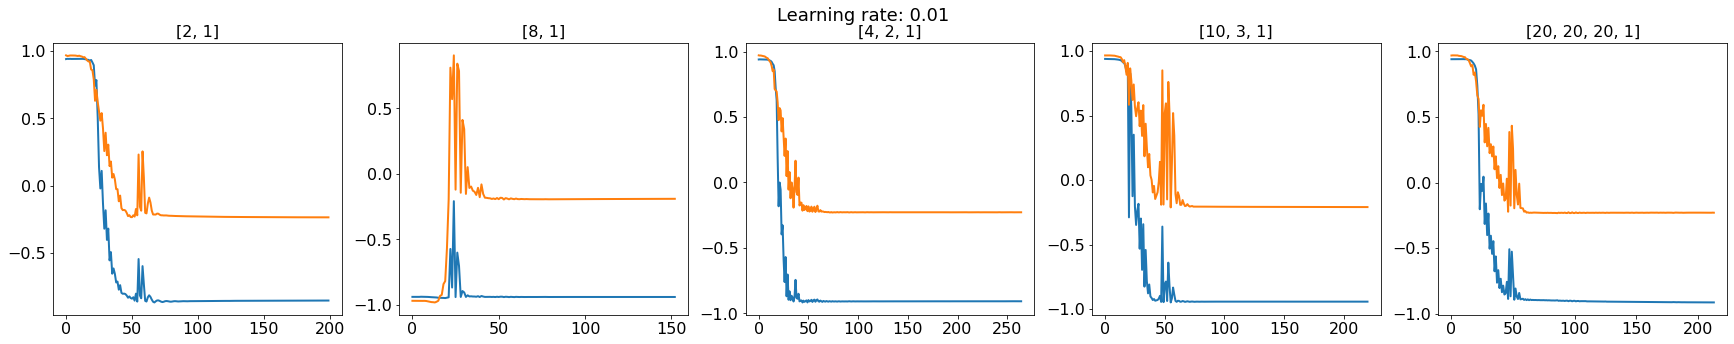

5


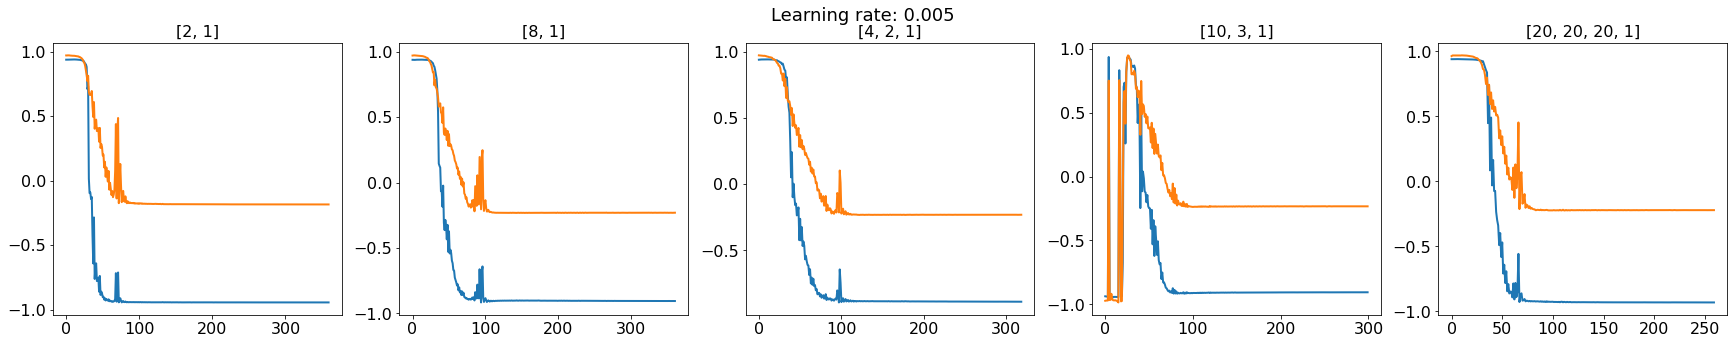

5


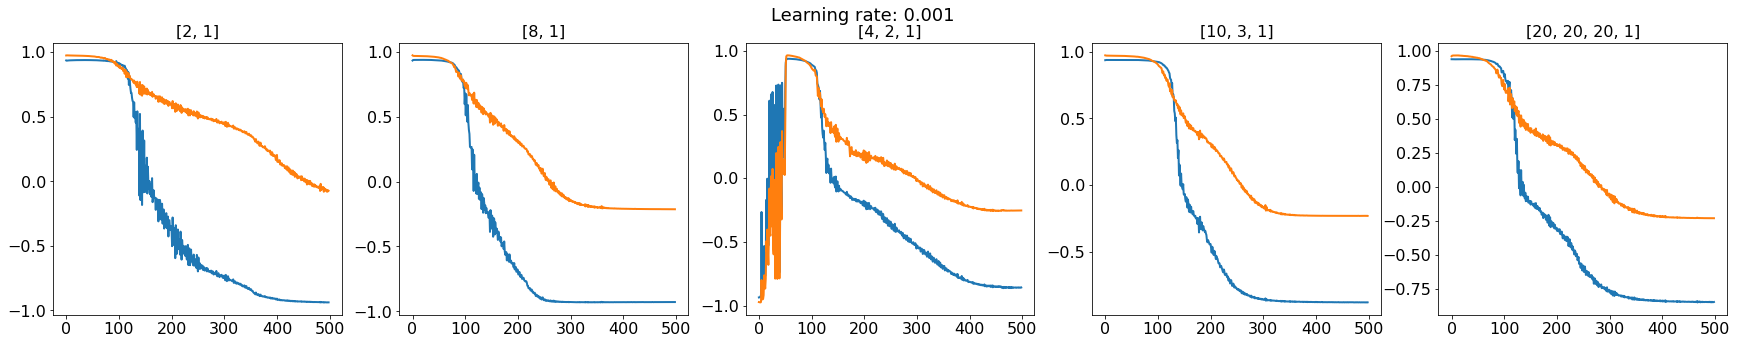

In [21]:
# seleziono un lr e vario i livelli densi
for lr in [0.01, 0.005, 0.001]:
    m1 = df_data4[('training', 'learning_rate')] == lr
    #m2 = df_data4[('graph_dataset','Num_grafi_per_tipo')] == 200
    res_df4 = df_data4[m1]

    col = res_df4.shape[0]
    print(col)
    fig, axs = plt.subplots(1,col,figsize=(30,5))
    for i, (j, row) in enumerate(res_df4.iterrows()):
        c_e_0 = row[('risultati', 'correlation_class0')]
        axs[i].plot(c_e_0)
        c_e_1 = row[('risultati', 'correlation_class1')]
        axs[i].plot(c_e_1)
        axs[i].set_title(res_df4.loc[j,('model','neurons_last_linear')])
    plt.suptitle(f"Learning rate: {lr}")
    #plt.savefig("correlation_vs_epochs_layers_2b.png")
    plt.show()

### stesso dataset e parametri, vario i layer densi

In [5]:
#file = "df_configs_new5.csv" # questo non va bene, avevo dimenticato a False il parametro  last_layer_dense
file = "df_configs_new7.csv"
df_last_linears = open_df_results(file)

Erano presenti 0 righe vuote


/tmp/ipykernel_8422/2016246085.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_data.drop(columns=['device', 'logging'], inplace=True)


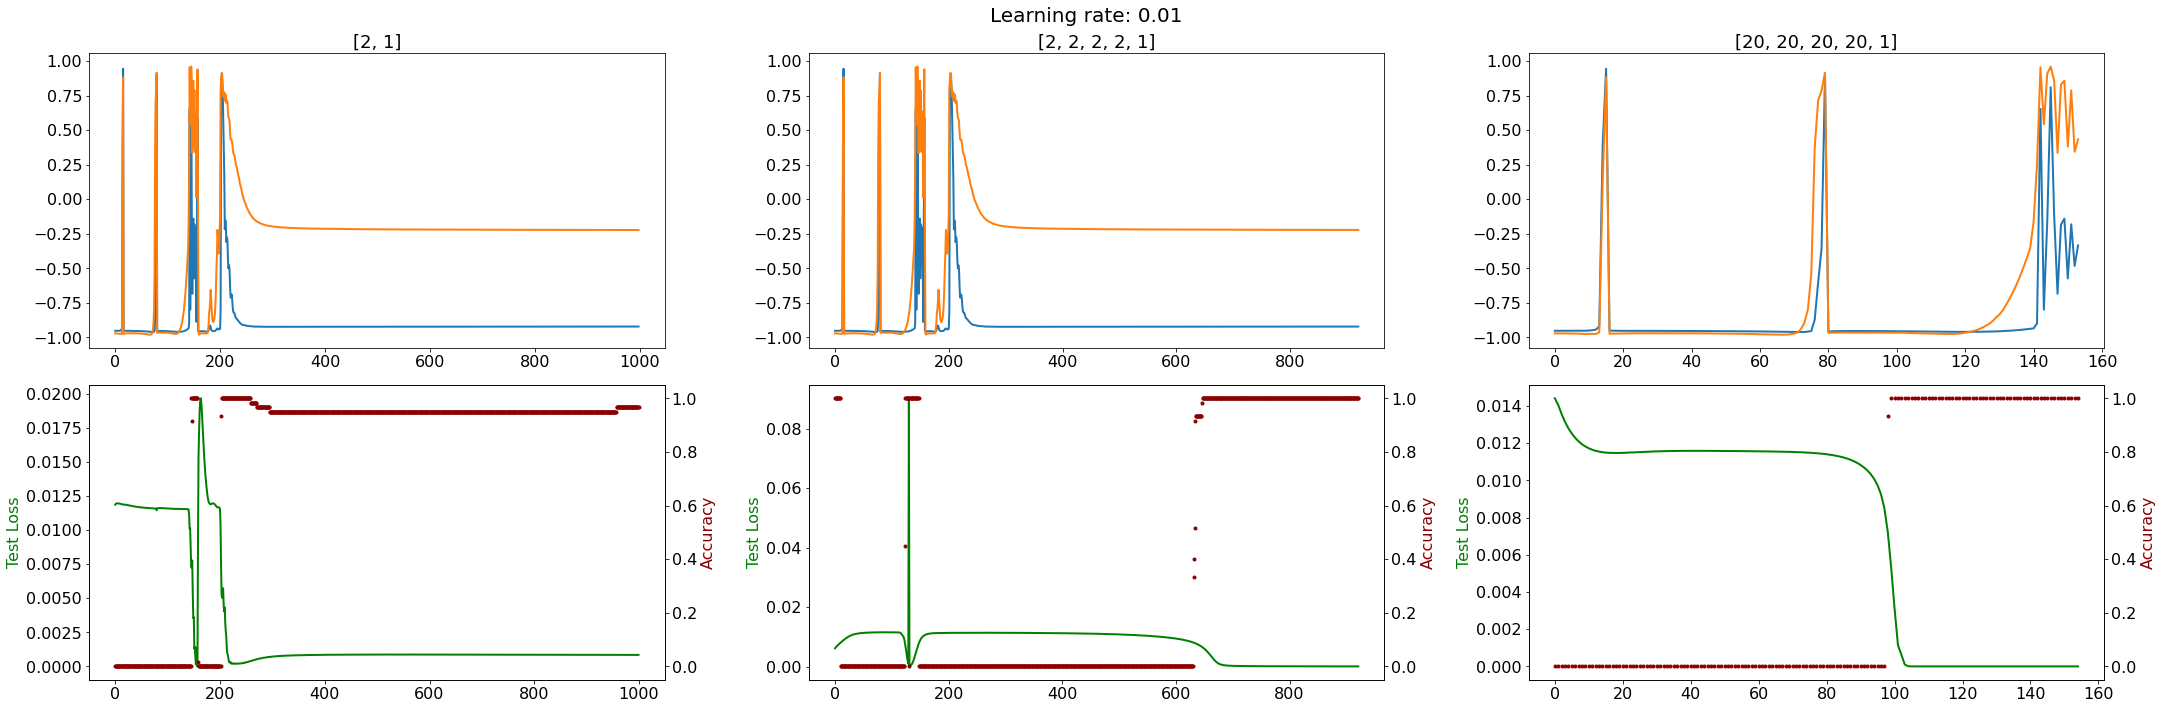

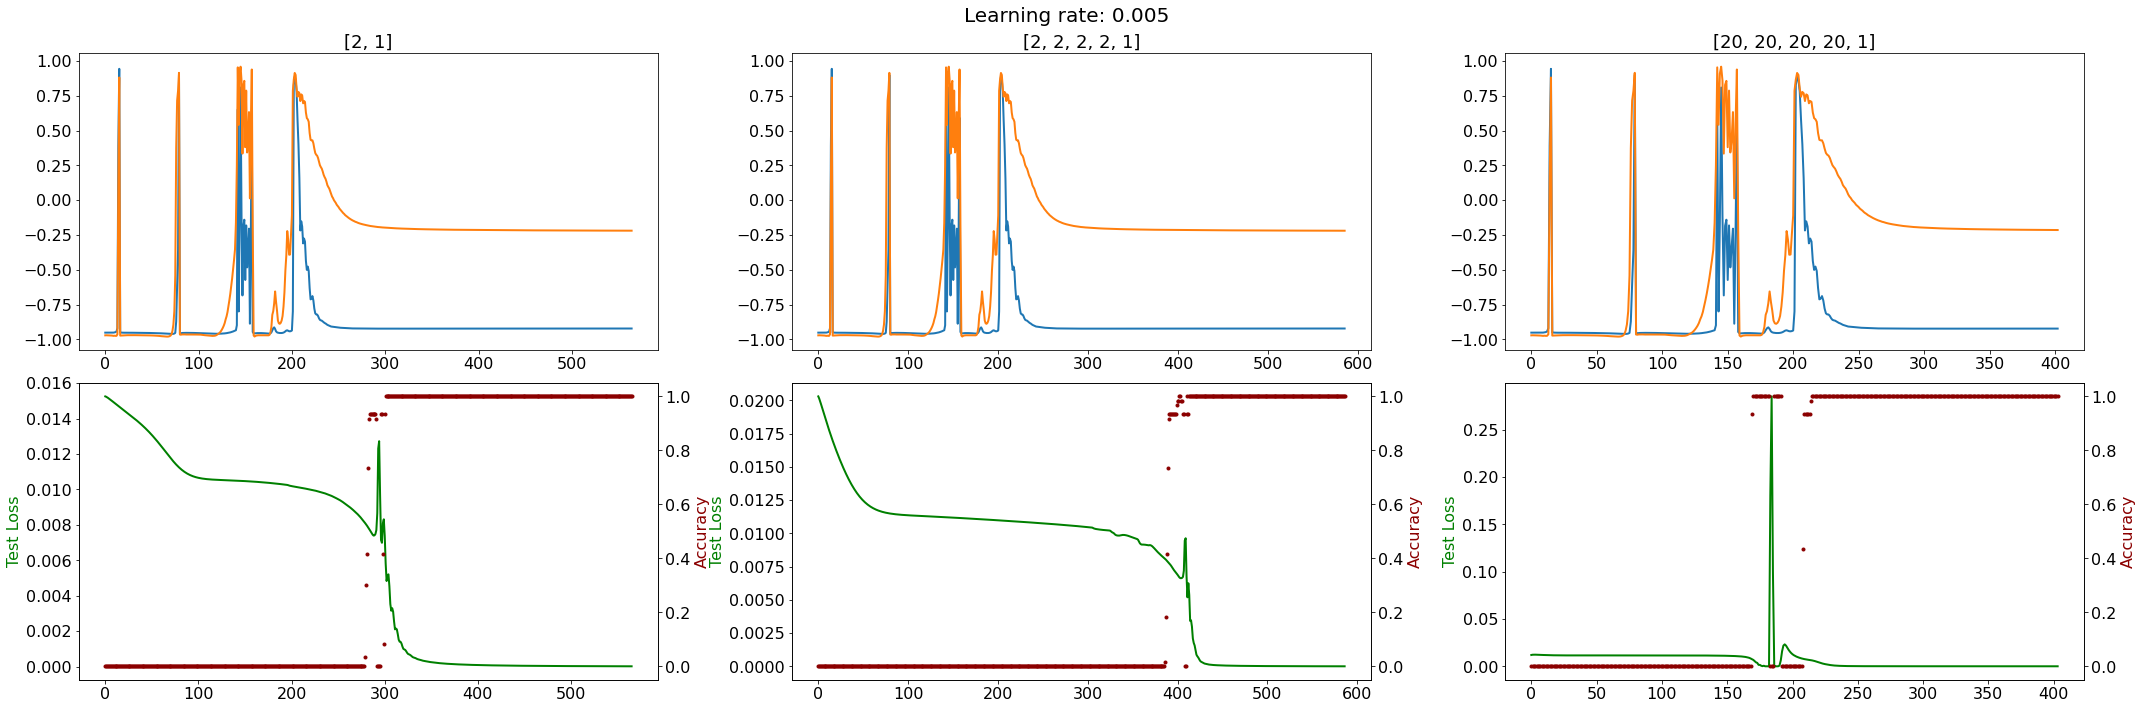

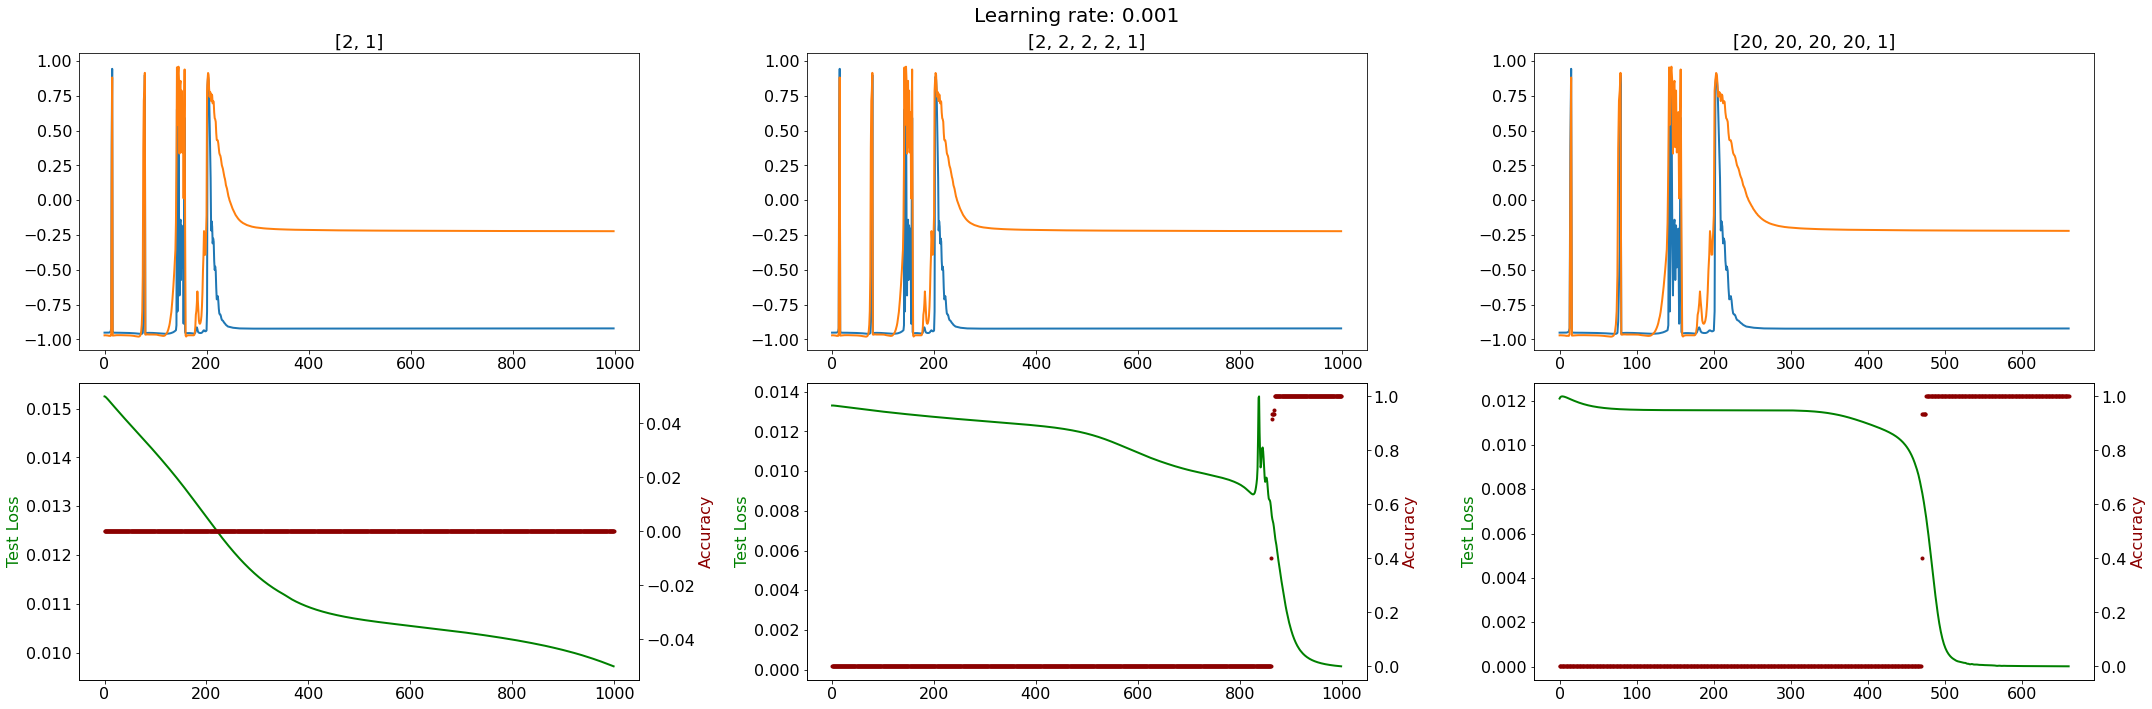

In [12]:
#m2 = df_data4[('graph_dataset','Num_grafi_per_tipo')] == 200
#res_df4 = df_data4[m1]

for lr in [0.01, 0.005, 0.001]:
    m1 = df_last_linears[('training', 'learning_rate')] == lr
    res = df_last_linears[m1]
    
    col = res.shape[0]
    fig, axs = plt.subplots(2,col,figsize=(30,10))
    for i, (j, row) in enumerate(res.iterrows()):
        c_e_0 = row[('risultati', 'correlation_class0')]
        axs[0][i].plot(c_e_0)
        c_e_1 = row[('risultati', 'correlation_class1')]
        axs[0][i].plot(c_e_1)
        axs[0][i].set_title(res.loc[j,('model','neurons_last_linear')])
        axt = axs[1][i].twinx()
        axs[1][i].plot(row[('risultati', 'test_loss')], color='g')
        axs[1][i].set_ylabel('Test Loss', color='g')
        axt.plot(row[('risultati', 'test_accuracy')], '.', color='darkred')
        axt.set_ylabel('Accuracy', color='darkred')

    plt.suptitle(f"Learning rate: {lr}")
    #plt.savefig("correlation_vs_epochs_layers_2b.png")
    plt.tight_layout()
    plt.show()

In [1]:
# verificare con il graph di tensorboard i pesi dei densi come cambiano... mi pare strano che tutti e 3 siano uguali

In [18]:
mask_8 = df_data['neurons_per_layer'].apply(lambda x: x[1])==8
mask_16 = df_data['neurons_per_layer'].apply(lambda x: x[1])==16
mask_32 = df_data['neurons_per_layer'].apply(lambda x: x[1])==32

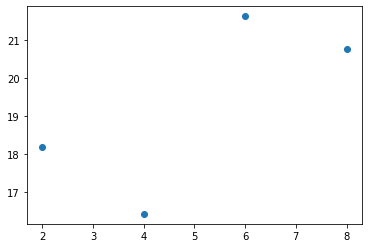

In [24]:
plt.scatter(df_data.loc[mask_8, 'neurons_per_layer'].apply(lambda x: x[2]), df_data.loc[mask_8, 'distance_of_means'])

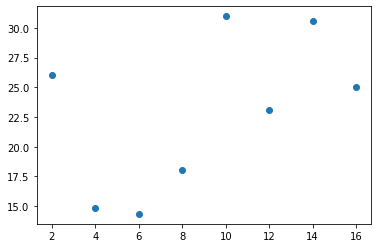

In [25]:
plt.scatter(df_data.loc[mask_16, 'neurons_per_layer'].apply(lambda x: x[2]), df_data.loc[mask_16, 'distance_of_means'])

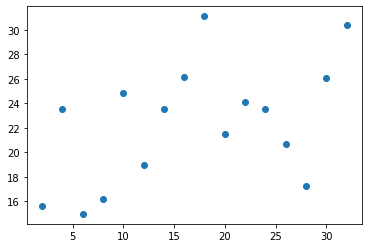

In [26]:
plt.scatter(df_data.loc[mask_32, 'neurons_per_layer'].apply(lambda x: x[2]), df_data.loc[mask_32, 'distance_of_means'])